In [4]:
from dotenv import load_dotenv
load_dotenv()

import os
data_path = os.getenv('DATA_PATH')
result_path = os.getenv('RESULT_PATH')

root = os.getenv('ROOT')

os.chdir(root)
os.getcwd()

'/disks/qnap3/users/23-miura/coauth-interest'

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import random
from source.package.util import plotter

# Misc


In [8]:
sample = res[res["previous_work"].isin(res["eid"])]
res.shape[0],sample.shape[0]

(75422, 65977)

In [77]:
paper = pd.read_pickle(data_path+"paper_detail/keywords.pickle")
paper

eid
229021                                          [NO KEYWORDS]
266363      [2D NMR, C NMR, H NMR, COSY, HMBC, HMQC, ID NM...
229022                                          [NO KEYWORDS]
229023                                          [NO KEYWORDS]
266364      [Ca2+-sensitivity-tension relation, Cardiac hy...
                                  ...                        
26093078                                        [NO KEYWORDS]
26106279                         [66.30, 82.45, 82.80, 85.80]
26093079                                        [NO KEYWORDS]
26106283                                        [NO KEYWORDS]
26093080                                        [NO KEYWORDS]
Name: keywords, Length: 78887776, dtype: object

In [79]:
paper_exploded = paper.explode("keywords")
list_keywords = paper_exploded.unique()
print(list_keywords)

['NO KEYWORDS' '2D NMR' 'C NMR' ... 'DNase I cleavage protection patterns'
 'Change of element content' "'contig'"]


In [80]:
len(list_keywords)

26314708

In [ ]:
for v in list_keywords:
    print(paper_exploded[paper_exploded["keywords"]==v].head())

In [23]:
merged = pd.merge(res, res,left_on="eid", right_on="previous_work", how="inner")
merged.shape[0]

3185640

In [24]:
merged.head()

,authid_x,year_x,seq_x,eid_x,source_authid_x,previous_work_x,authid_y,year_y,seq_y,eid_y,source_authid_y,previous_work_y
0,6701571681,1,1,51349148462,34869229900,3.454718e+10,6701571681,0,1,57749173609,34869229900,5.134915e+10
1,6701571681,1,1,51349148462,34869229900,3.454718e+10,7005864158,0,1,57749173609,34869229900,5.134915e+10
2,6701571681,1,1,51349148462,34869229900,3.454718e+10,7005981062,0,1,57749173609,34869229900,5.134915e+10
3,6701571681,1,1,51349148462,34869229900,3.454718e+10,7102165991,0,1,57749173609,34869229900,5.134915e+10
4,6701571681,1,1,51349148462,34869229900,3.454718e+10,7005864158,0,6,57749173609,6701571681,5.134915e+10


# Memory

In [9]:
res = pd.read_pickle(result_path + 'PM_5k.pickle')
year_df = pd.read_pickle(data_path+"paper_detail/year.pickle")
year_df.head()

eid
229021    1997
266363    1998
229022    1982
229023    1989
266364    1998
Name: year, dtype: int64

In [10]:
res = pd.merge(res, year_df, on="eid", how="left")
res.head()

,authid,year_x,seq,eid,source_authid,previous_work,year_y
0,55323498300,7,2,85018262613,23093224900,6.454914e+10,2016
1,16506417600,1,1,84871729448,57209623964,8.487197e+10,2013
2,35323952200,2,1,84871968771,57209623964,7.795399e+10,2012
3,35323952200,1,1,84871729448,57209623964,8.487197e+10,2013
4,55258183300,3,2,84871729448,57209623964,7.795399e+10,2013


In [34]:
res = res.sort_values(by="year_y")
res.head()

,authid,year_x,seq,eid,source_authid,previous_work,year_y
58536,22976866100,0,6,49849110035,22977910000,1.334491e+07,1970
58509,22973891300,0,2,14936978,22977910000,4.984911e+10,1970
58508,22973891300,0,1,49849110035,22977910000,3.920932e+07,1970
58537,22976866100,0,2,14936978,22977910000,4.984911e+10,1970
23330,56036220700,0,1,4243739087,22977581300,1.481536e+07,1970


In [53]:
res.sample(frac=1)

,authid,year_x,seq,eid,source_authid,previous_work,year_y
43835,55481923600,1,1,85076851556,57200788437,8.506819e+10,2020
73528,35432089800,1,1,9144228242,57205954610,4.197471e+07,2004
54743,35499983600,0,1,85045795877,57195773074,8.505446e+10,2018
62510,35416802700,0,1,84958073621,55258232900,8.496492e+10,2016
34811,35073351000,0,4,84864977159,7401627455,8.485670e+10,2012
...,...,...,...,...,...,...,...
55247,57210135359,0,2,85115759132,46761614700,8.511250e+10,2021
9870,57221623423,0,2,85108387087,57217609397,8.510645e+10,2021
743,53063453900,3,1,85047101313,57208456785,8.491878e+10,2018
53704,7003802262,1,1,32310466,7403554184,3.125152e+07,1998


(array([0.000e+00, 7.551e+03, 3.980e+03, 2.358e+03, 1.482e+03, 1.043e+03,
        7.910e+02, 5.490e+02, 4.190e+02, 3.380e+02, 2.570e+02, 1.990e+02,
        1.550e+02, 1.300e+02, 1.100e+02, 9.100e+01, 8.700e+01, 7.300e+01,
        5.700e+01, 4.900e+01, 4.400e+01, 3.900e+01, 2.300e+01, 3.100e+01,
        1.800e+01, 2.400e+01, 2.000e+01, 1.300e+01, 2.100e+01, 9.000e+00,
        1.300e+01, 1.400e+01, 1.000e+01, 1.300e+01, 6.000e+00, 3.000e+00,
        4.000e+00, 7.000e+00, 5.000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39.]),
 <BarContainer object of 39 artists>)

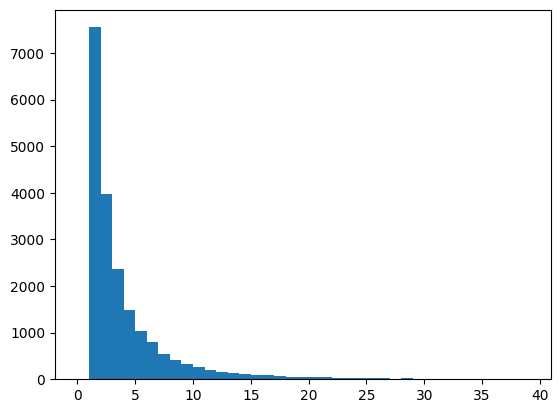

In [32]:
plt.hist(res.value_counts(subset=["authid","source_authid"]),bins=range(0,40))

In [64]:
null_probability =[1]
delta_t = 3

res_shuffled = res.sample(frac=1)

for E in range(2,20):
    sum_intervals = res_shuffled.groupby(by=["authid","source_authid"]).rolling(window=E-1)["year_x"].sum() # sum of itervals of successive E events
    pE_n = sum_intervals[sum_intervals<=delta_t].count()/res["eid"].count()
    null_probability.append(pE_n)

In [63]:
probability =[1]
delta_t = 3

for E in range(2,20):
    sum_intervals = res.groupby(by=["authid","source_authid"]).rolling(window=E-1)["year_x"].sum() # sum of itervals of successive E events
    pE_n = sum_intervals[sum_intervals<=delta_t].count()/res["eid"].count()
    probability.append(pE_n)

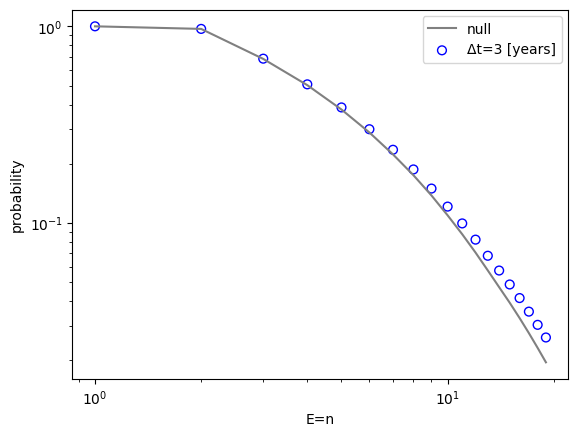

In [75]:
# plt.scatter(range(1,20),null_probability,s=40,c="grey", label="null")
plt.plot(range(1,20),null_probability,c="grey", label="null")
plt.scatter(range(1,20),probability,s=40,facecolors="none", edgecolors="blue", label="Δt=3 [years]")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("E=n")
plt.ylabel("probability")
plt.legend()

# coauthorship subset / coauthorship inequality

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/disks/qnap3/users/23-miura/coauth-interest/source/package/util.py:48: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(left, right)
/disks/qnap3/users/23-miura/coauth-interest/source/package/util.py:49: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom, top)


(array([5.34348865e-01, 3.28255675e-01, 8.06451613e-02, 2.53882915e-02,
        1.48347272e-02, 7.26802071e-03, 2.58861012e-03, 2.28992433e-03,
        1.39386699e-03, 5.97371565e-04, 7.96495420e-04, 1.99123855e-04,
        1.99123855e-04, 1.99123855e-04, 9.95619275e-05, 9.95619275e-05,
        9.95619275e-05, 9.95619275e-05, 0.00000000e+00, 2.98685783e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        9.95619275e-05, 0.00000000e+00, 9.95619275e-05, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5]))

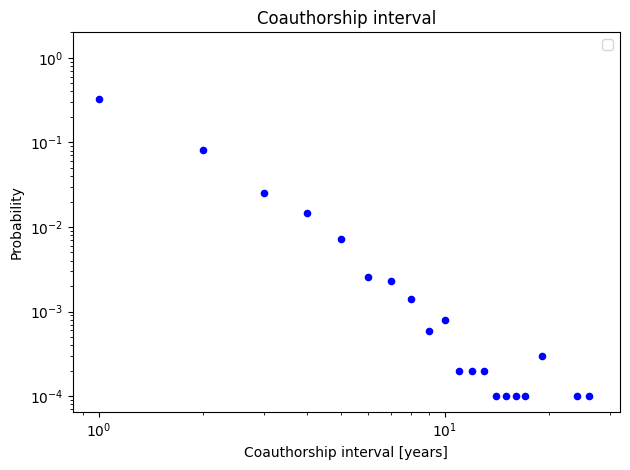

In [84]:
coauth_counts =res.value_counts("source_authid")
middle_author = coauth_counts[(coauth_counts>=30) *(coauth_counts<=50)].index.values
res_middle = res[res["source_authid"].isin(middle_author)]
plotter(res_middle["year_x"])


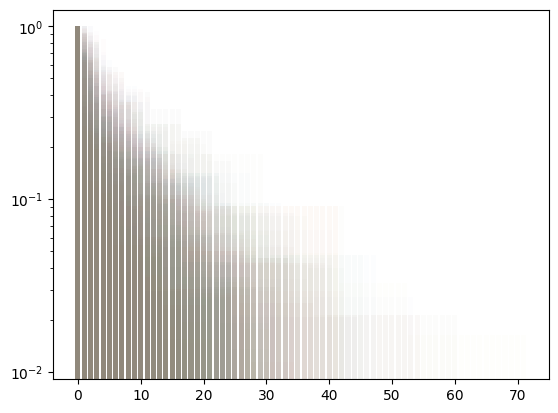

In [123]:
coauth_counts =res.value_counts("source_authid")
for i in range(100):
    coauth_inequality = res[res["source_authid"]==coauth_counts[coauth_counts>100].sample().index[0]].value_counts("authid")
    x = [i for i in range(coauth_inequality.shape[0])]
    y = [coauth_inequality.loc[i]/coauth_inequality.max() for i in coauth_inequality.index]
    plt.bar(x=x,height=y,alpha=0.01)
    plt.yscale("log")
    # plt.hist((coauth_inequality-coauth_inequality.min())/(coauth_inequality.max()-coauth_inequality.min()),bins=np.linspace(0,1,20),density=True ,color="blue",alpha=0.01)

[(0, 1), (1, 2), (2, 2), (3, 2), (4, 2), (5, 3), (6, 0)]


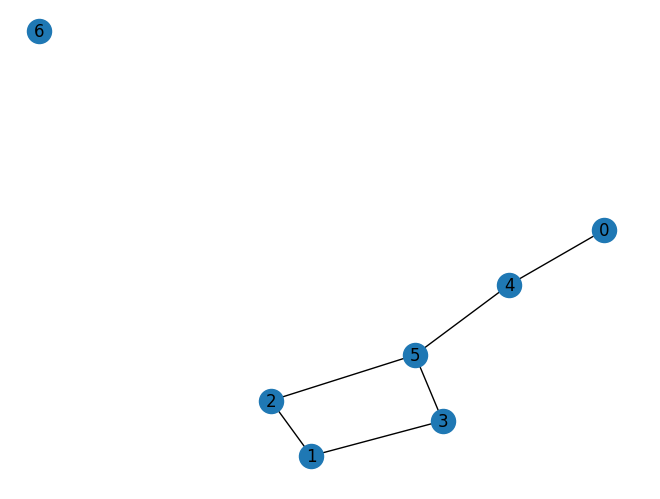

In [150]:
import networkx as nx

degrees = [0, 1, 2, 2, 2, 2, 3]
# H1 = nx.havel_hakimi_graph(degrees)
# H2 = nx.havel_hakimi_graph(degrees)
# H2 = nx.relabel_nodes(H2, lambda x: x + 10)

H = nx.havel_hakimi_graph(degrees)
# H = nx.compose(H1,H2)
print(H.degree)
nx.draw(H,with_labels=True)

In [151]:
for i in range(3):
    print(nx.k_shell(H, k=i).nodes())

[6]
[0, 4]
[1, 2, 3, 5]


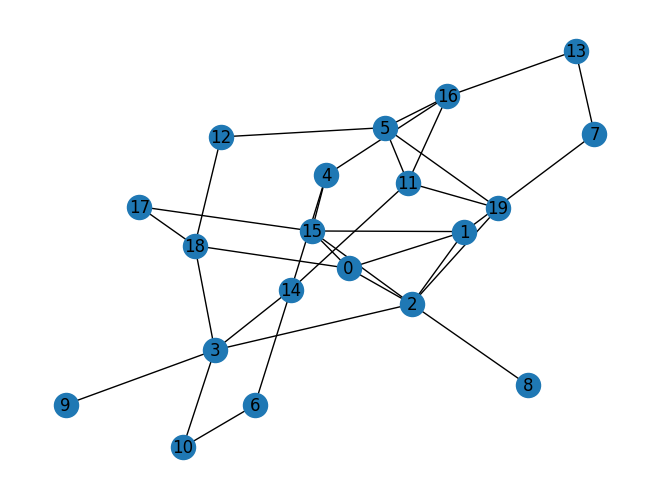

In [157]:
num_nodes = 20
probability = 0.2

G = nx.erdos_renyi_graph(num_nodes, probability)
nx.draw(G, with_labels=True)

In [159]:
for i in range(5):
    print(nx.k_shell(G, k=i).nodes())

[]
[8, 9]
[3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 16, 17, 18, 19]
[0, 1, 2, 15]
[]


Edge List:
(1, 4)
(1, 5)
(1, 101)
(2, 102)
(3, 4)
(3, 5)
(4, 5)
(100, 101)
(100, 103)
(100, 104)
(101, 103)
(101, 104)
(102, 103)
(102, 104)


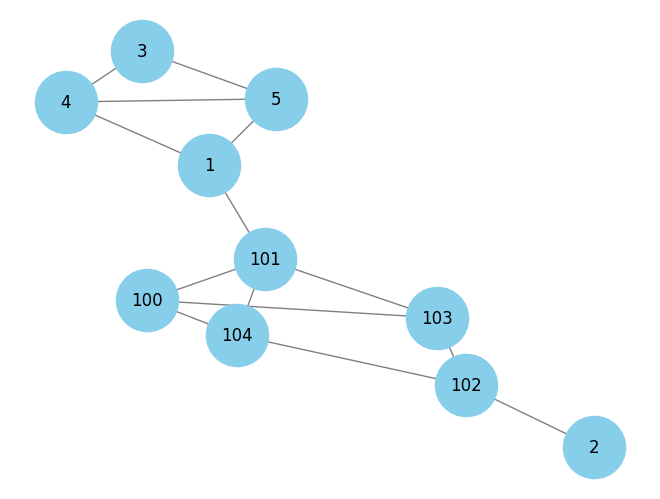

In [175]:
import networkx as nx
import matplotlib.pyplot as plt

# Create first graph (G1)
G1 = nx.erdos_renyi_graph(5, 0.4)
# Relabel G1 to avoid node conflicts
G1 = nx.relabel_nodes(G1, lambda x: x + 1)

# Create second graph (G2)
G2 = nx.erdos_renyi_graph(5, 0.4)
# Relabel G2 to avoid node conflicts
G2 = nx.relabel_nodes(G2, lambda x: x + 100)

# Interconnect G1 and G2 by adding edges between them
# Example: Connecting node 1 from G1 to node 101 from G2
interconnect_edges = [(1, 101), (2, 102)]

# Create a new graph to hold G1, G2, and the interconnections
G = nx.compose(G1, G2)
G.add_edges_from(interconnect_edges)

# Display the edge list
edge_list = list(G.edges())
print("Edge List:")
for edge in edge_list:
    print(edge)

# Draw the graph
nx.draw(G, with_labels=True, node_color='skyblue', node_size=2000, edge_color='gray')
plt.show()


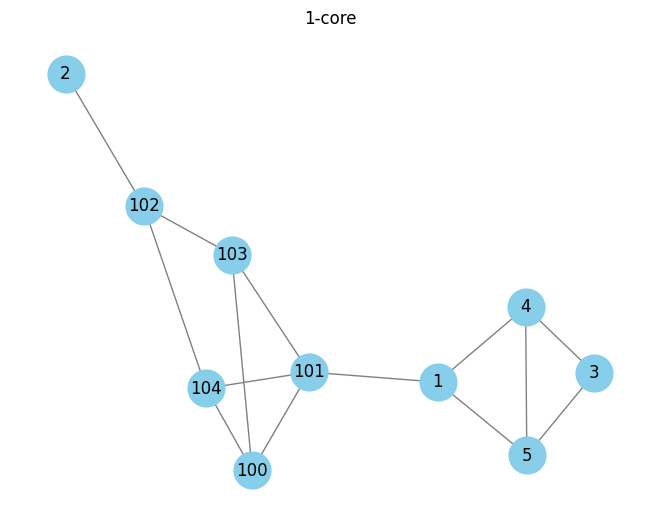

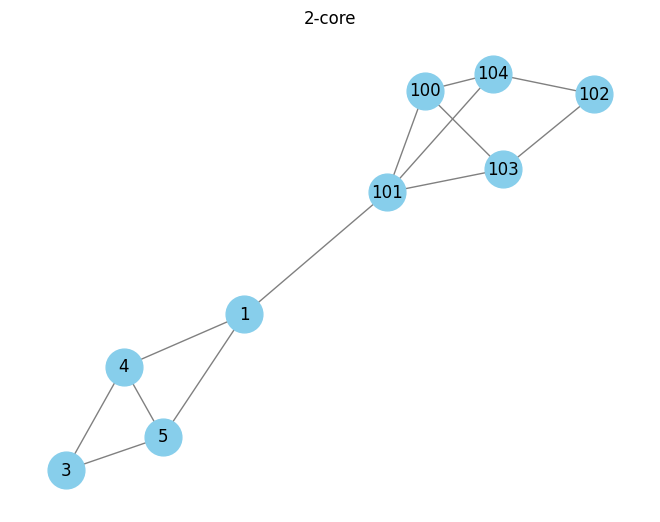

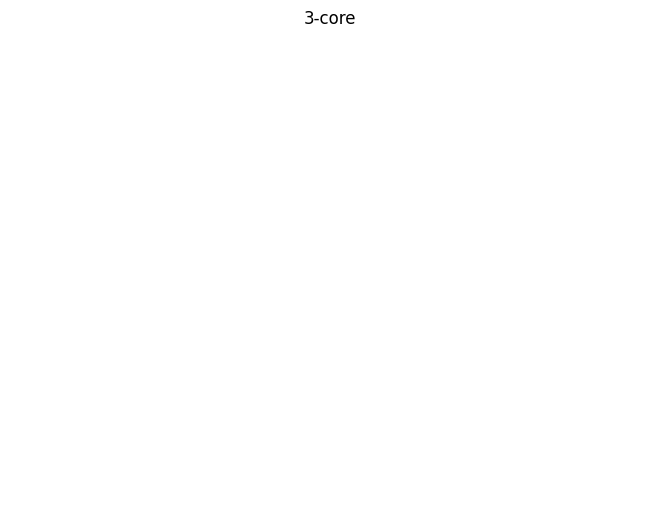

In [176]:
for k in range(1, 4):
    draw_k_core(G, k)

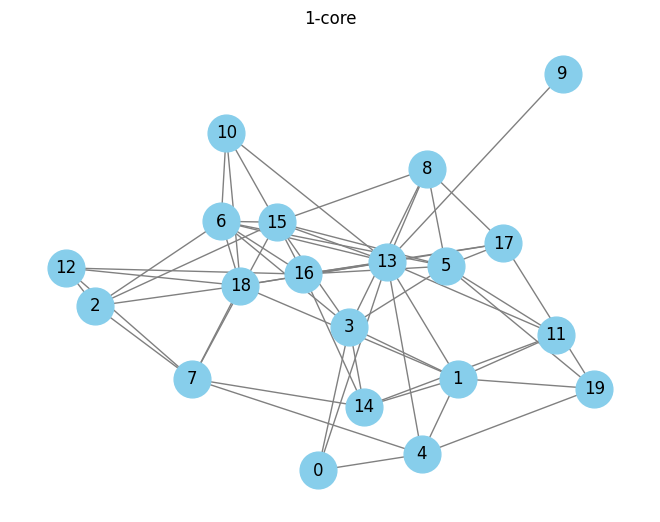

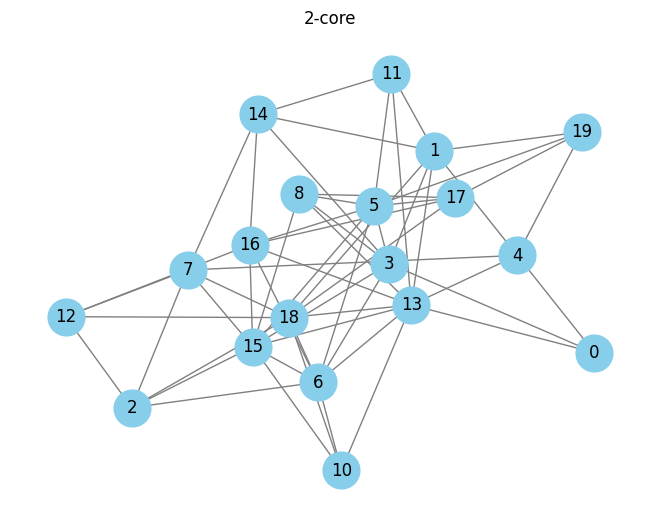

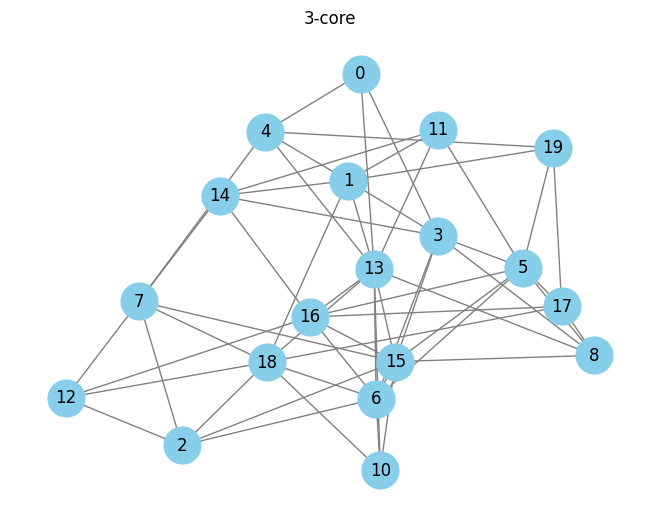

1-core:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
2-core:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
3-core:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [177]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate a random graph
num_nodes = 20
probability = 0.3
G = nx.erdos_renyi_graph(num_nodes, probability)

# Function to visualize the k-core
def draw_k_core(G, k):
    k_core = nx.k_core(G, k)
    pos = nx.spring_layout(k_core)
    plt.figure()
    nx.draw(k_core, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
    plt.title(f'{k}-core')
    plt.show()

# Extract and visualize k-cores for k = 1 to 3
for k in range(1, 4):
    draw_k_core(G, k)

# Extract k-cores for k = 1 to 3 and print them
for k in range(1, 4):
    k_core = nx.k_core(G, k)
    print(f"{k}-core:")
    print(list(k_core.nodes))


Edge (1, 2): 0.25
Edge (1, 3): 0.35000000000000003
Edge (2, 4): 0.25
Edge (3, 4): 0.35000000000000003
Edge (3, 5): 0.4
The most important edge is (3, 5) with centrality 0.4


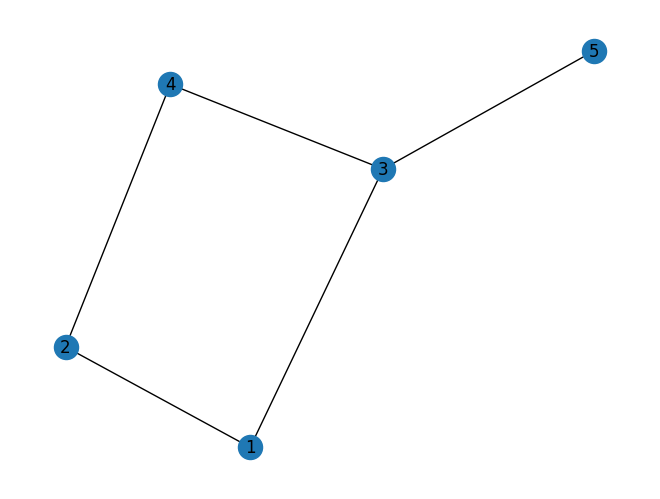

In [179]:
import networkx as nx

# Create a graph (you can use any graph you have)
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4), (3, 5)])

# Compute edge betweenness centrality
edge_betweenness = nx.edge_betweenness_centrality(G)

# Print edge betweenness centrality for each edge
for edge, centrality in edge_betweenness.items():
    print(f"Edge {edge}: {centrality}")

# If you want to find the most important edge based on betweenness centrality:
most_important_edge = max(edge_betweenness, key=edge_betweenness.get)
print(f"The most important edge is {most_important_edge} with centrality {edge_betweenness[most_important_edge]}")

nx.draw(G, with_labels=True)

Edge List:
(1, 3)
(1, 5)
(1, 101)
(2, 3)
(2, 4)
(2, 102)
(100, 102)
(102, 103)
(102, 104)


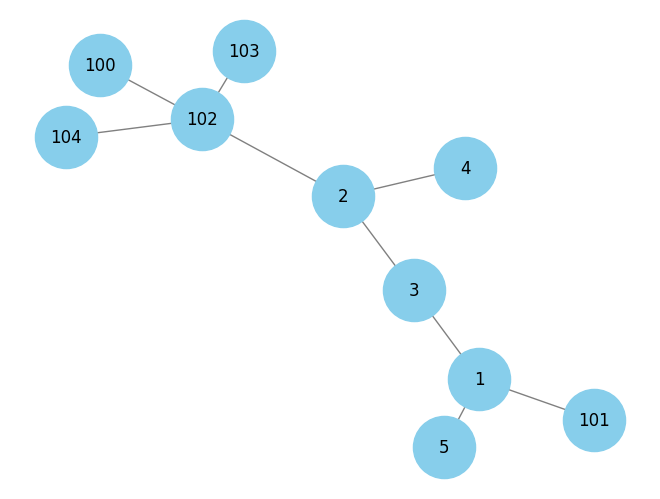

Edge (1, 3): 0.4666666666666667
Edge (1, 5): 0.2
Edge (1, 101): 0.2
Edge (2, 3): 0.5333333333333333
Edge (2, 4): 0.2
Edge (2, 102): 0.5333333333333333
Edge (100, 102): 0.2
Edge (102, 103): 0.2
Edge (102, 104): 0.2
The most important edge is (2, 3) with centrality 0.5333333333333333


In [192]:
import networkx as nx
import matplotlib.pyplot as plt

# Create first graph (G1)
G1 = nx.erdos_renyi_graph(5, 0.4)
# Relabel G1 to avoid node conflicts
G1 = nx.relabel_nodes(G1, lambda x: x + 1)

# Create second graph (G2)
G2 = nx.erdos_renyi_graph(5, 0.4)
# Relabel G2 to avoid node conflicts
G2 = nx.relabel_nodes(G2, lambda x: x + 100)

# Interconnect G1 and G2 by adding edges between them
# Example: Connecting node 1 from G1 to node 101 from G2
interconnect_edges = [(1, 101), (2, 102)]

# Create a new graph to hold G1, G2, and the interconnections
G = nx.compose(G1, G2)
G.add_edges_from(interconnect_edges)

# Display the edge list
edge_list = list(G.edges())
print("Edge List:")
for edge in edge_list:
    print(edge)

# Draw the graph
nx.draw(G, with_labels=True, node_color='skyblue', node_size=2000, edge_color='gray')
plt.show()

# Compute edge betweenness centrality
edge_betweenness = nx.edge_betweenness_centrality(G)

# Print edge betweenness centrality for each edge
for edge, centrality in edge_betweenness.items():
    print(f"Edge {edge}: {centrality}")

# If you want to find the most important edge based on betweenness centrality:
most_important_edge = max(edge_betweenness, key=edge_betweenness.get)
print(f"The most important edge is {most_important_edge} with centrality {edge_betweenness[most_important_edge]}")



In [193]:
nx.betweenness_centrality(G)

{1: 0.41666666666666663,
 2: 0.6666666666666666,
 3: 0.5,
 4: 0.0,
 5: 0.0,
 100: 0.0,
 101: 0.0,
 102: 0.5833333333333333,
 103: 0.0,
 104: 0.0}

In [197]:
G.add_edges_from([(2,50),(50,51),(50,52),(50,53),(51,52),(52,53)])

{1: 0.2948717948717949,
 2: 0.7692307692307692,
 3: 0.3846153846153846,
 4: 0.0,
 5: 0.0,
 100: 0.0,
 101: 0.0,
 102: 0.4230769230769231,
 103: 0.0,
 104: 0.0,
 50: 0.391025641025641,
 51: 0.0,
 52: 0.00641025641025641,
 53: 0.0}

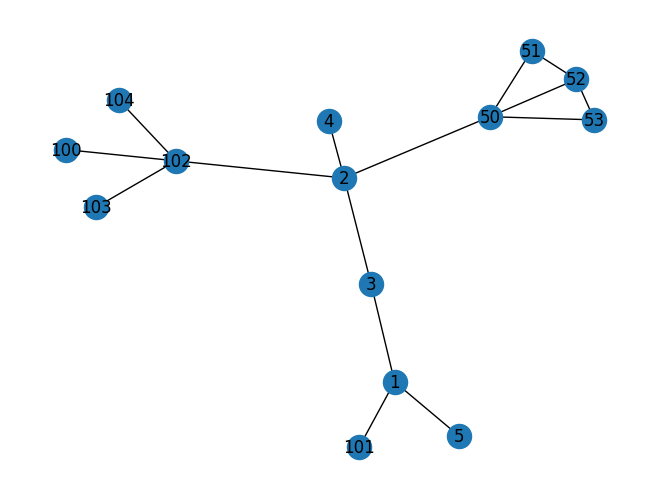

In [199]:
nx.draw(G,with_labels=True)
nx.betweenness_centrality(G)